In [ ]:
!gdown --id 1tDYCBu5xDIZHNtvO4weGqHrVGnduBBf6
!gdown --id 1xEdjnC8G-r_FuzSiPjofuuuMqBos37Kl
!pip install face_recognition
!pip install imutils
from google.colab.patches import cv2_imshow
from imutils import paths
import face_recognition
import pickle
import cv2
import os
!unzip Input.zip

Downloading...
From: https://drive.google.com/uc?id=1tDYCBu5xDIZHNtvO4weGqHrVGnduBBf6
To: /content/encodings.pickle
14.2MB [00:00, 86.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1xEdjnC8G-r_FuzSiPjofuuuMqBos37Kl
To: /content/Input.zip
100% 498k/498k [00:00<00:00, 15.2MB/s]
     |████████████████████████████████| 100.2MB 43kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=86b39467c20f29470c9e57626c0f76a093bb954cbfa4b86c3e48578d7b379c16
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models
Archive:  Input.zip
   creating: Input/
  inflating: Input/face_recog_2.png  
  inflating: Input/face_recog_1.JPG  
  inflating: Input/face_recog_3.JPG  
  inflating: Input/face_recog_4.JPG  
  inflating: Input/face_recog_5.JPG  


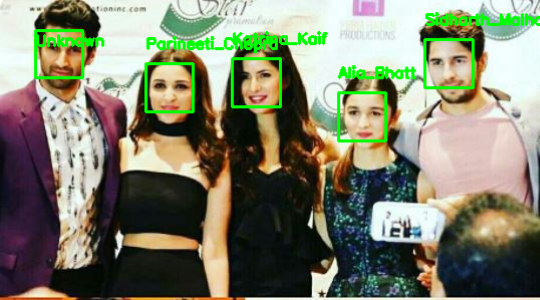

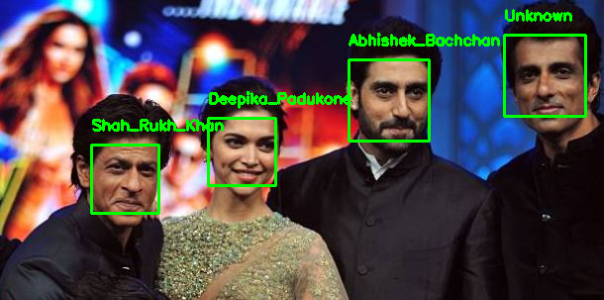

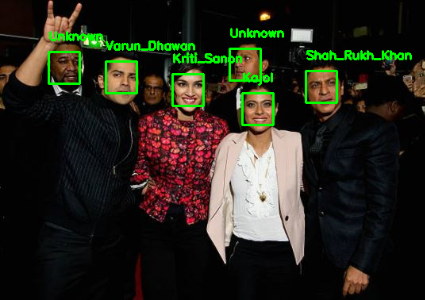

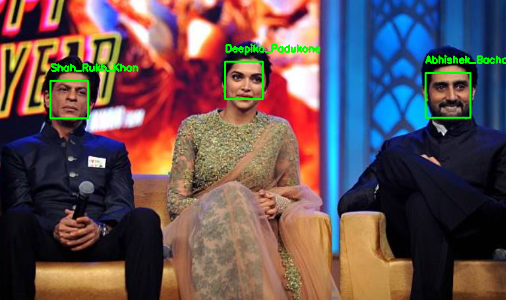

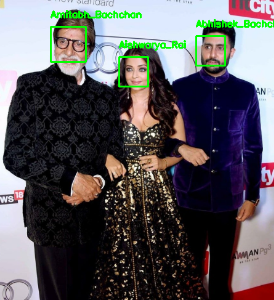

In [ ]:
args = { "encodings": "encodings.pickle","detection_method":"cnn"}
data = pickle.loads(open(args["encodings"], "rb").read())

for xy in os.listdir('Input'):
  if xy[-3:]!="JPG" and xy[-3:]!="PNG" and xy[-3:]!="jpg" and xy[-3:]!="png":
    continue

  image = cv2.imread('Input/'+xy)
  try:
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    boxes = face_recognition.face_locations(rgb,
      model=args["detection_method"])
    encodings = face_recognition.face_encodings(rgb, boxes)
    names = []
    for encoding in encodings:

      matches = face_recognition.compare_faces(data["encodings"],encoding)
      name = "Unknown"

      if True in matches:
        matchedIdxs = [i for (i, b) in enumerate(matches) if b]
        counts = {}
        for i in matchedIdxs:
          name = data["names"][i]
          counts[name] = counts.get(name, 0) + 1
        name = max(counts, key=counts.get)
        val1 = counts[name]
        counts[name]=0
        val2 = counts[max(counts, key=counts.get)]
        if val1-val2<10:
          name='Unknown'
      names.append(name)
    for ((top, right, bottom, left), name) in zip(boxes, names):
      cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
      y = top - 15 if top - 15 > 15 else top + 15
      cv2.putText(image, name, (left, y), cv2.FONT_HERSHEY_SIMPLEX,	0.5, (0, 255,0), 2)
  except:
    pass
  cv2_imshow(cv2.resize(image, (0, 0), fx = 300/image.shape[0], fy = 300/image.shape[0]))
